# Traitement les titre des articles d'une journal

### Ouvrire le fichier JSON

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime
from datetime import datetime,date

file = open("fixed_data.json","r",encoding="utf8")
data = json.load(file)
df = pd.DataFrame(data)
#df.head()


### Obtenir le numero de la semaine a partir d'un date donneé

In [2]:
# get week number from date format 
def weekNum(str_date):
    d = datetime.strptime(str_date,"%Y-%m-%dT%H:%M:%S.%fZ")
    new_format = "%Y-%m-%d"
    d.strftime(new_format)
    return datetime.date(d).isocalendar()[1]


### Ajouter une colonne qui contient le numéro de la semaine

In [3]:
#new df have a weeks columens
def newDataFrame(df):
    dates_list = df["published"].tolist()
    weeks=list()
    for d in dates_list:
        weeks.append(weekNum(d))
        
    #add Week column to df 
    df['Week'] = weeks
    return df


### Récuperer tout les titres des articles pour un semaine donneé

In [4]:
#get titles of a given week
def getTitlesByWeek(w,df):
    l = list()
    for i in df.index:
        if df["Week"][i] == w:
            l.append(df["title"][i])
    return l
        


### Extraire tout les mots et calculer le nombre d'occurrences pour chacun

In [5]:
# get word:occurance dictinory  top 10 words
def getWordsOcc(titles):
    di = dict()
    for title in titles:
        words = title.split(" ")
        for w in words:
            if w in di:
                di[w] = di[w]+1
            else:
                di[w] = 1
    
    return di


### Clean data  Delete all stop words from words dictionary  

In [6]:
#clean words data remove connecteurs to get the good words
def CleanedData(di):
    f = open("stop_words_french.json","r",encoding="utf8")
    dta = json.load(f)
    stopwords = pd.DataFrame(dta)
    stopwords_list = stopwords[0].tolist()
    
    new_dict = dict()
    for key in di:
        if key.lower() not in stopwords_list:
            new_dict[key] = di[key]
    return new_dict



### Main Function

In [16]:
#main fucnction to excute the operation
def getTopWords(week):
    if week > 22 or week < 10 :
        print("les donneés de cette période ne sont pas disponible !! ")
    else:
        Articles_data = newDataFrame(df)
        #Articles_data.head()
        titles = getTitlesByWeek(week,Articles_data)
        #print(titles)
        my_dict = getWordsOcc(titles)
        #print(my_dict)
        cl_dict = CleanedData(my_dict)
        #print(cl_dict)
        words_data = pd.DataFrame(list(cl_dict.items()),columns = ['Word','Occu'])
        words_data = words_data.sort_values(by='Occu', ascending=False)
        words_data.head(10).plot(kind='bar',x='Word',y='Occu')
    
        words_data.head(10).to_json('myDataResult.json', orient = 'split', compression = 'infer', index = 'false')
    
        print("Operation termineé avec succes , vous trouvez le résultat dans le fichier : : myDataResult.json ")



### Test

Entrez une date :   (ex: 2021-03-19) 
2021-03-19
Operation termineé avec succes , vous trouvez le résultat dans le fichier : : myDataResult.json 
writ anything to quit 
j


'j'

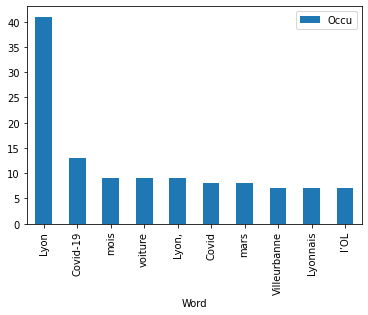

In [27]:

d = input("Entrez une date :   (ex: 2021-03-19) \n")
def weekN(str_date):
    d = datetime.strptime(str_date,"%Y-%m-%d")
    new_format = "%Y-%m-%d"
    d.strftime(new_format)
    return datetime.date(d).isocalendar()[1]

getTopWords(weekN(d))

## this is just to allow the user to read message in the end of operation - when exécuting python in cmd terminal
input("writ anything to quit \n")